<a href="https://colab.research.google.com/github/MathBird17/Optimization/blob/main/OptimizacionConRestricciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicaciones del metodo de optimización con restricciones Trust-Region by Le Ruffy 

# Introducción 
La optimización de funciones en la vida real tiene restricciones, bien sea en los intervalos en que estan definidas las variables, en la naturaleza de estas o en una relación entre ellas. Es por ello que se tienen metodos de optimización con cierto tipo de restricciones, el metodo que vamos usar aqui sera el Trust-Region, el cual es una extensión del metodo de multiplicadores de Lagrange para optimización sin restricciones y es por ello que se pide que la función a minimizar sea diferenciable al igual que las restricciones tanto de igualdad $h(x)=0$ como de desigualdad $g(x)\leq 0$. \\
En el presente trabajo se enfocara en desarrollar dos aplicaciones del metodo Trust-Region: la primera, una aplicación en la estimación puntual de una muestra aleatoria de 50 elementos con una distribución Cauchy y la segunda, resuelve la pregunta de si es posible atacar problemas de optimización entera con este metodo. 

## Optimizacion con restricciones para hallar el estimador de máxima verosimilitud de una distribución de Cauchy By Le Ruffy.
La distribución de Cauchy es una función de densidad de probabilidad caracterizada por carecer de un valor esperado o una varianza. La función de densidad de Cauchy de parametros $\mu$ y $\sigma >0$ esta definida como:
\begin{equation}
f(x)=\frac{\sigma}{\pi (\sigma^2+(x-\mu)^2)}
\end{equation}
Si tenemos una variable aleatoria $X$ que se asume tiene una distribución de tipo Cauchy pero no conocemos los parametros de esta, entonces podriamos estimar los parametros tomando una muestra aleatoria de $n$ elementos con el metodo de maxima verosilimitud, el cual consiste en hallar los parametros que maximizan la probabilidad de obtener los valores de nuestra muestra aleatoria. De esta manera, sea $x_1,...,x_n$ una muestra aleatoria de n elementos, este metodo se reduce a encontrar el maximo de la función de verosimilitud $L(\theta)$:
\begin{equation}
L(\theta)=f(x_1,...,x_n,\theta)
\end{equation}
Donde $\theta$ es el vector de parametros de la distribución y $f(x_1,...,x_n)$ es la función conjunta de probabilidad evaluada en la muestra alatoria.Ya se a tratado de resolver el problema analiticamente por multiplicadores de Lagrange, sin embargo, hasta el momento solo se tiene para muestras hasta de 4 elementos [1], por lo que no resulta tan preciso como deseariamos. Es aqui donde entra a hacer parte la optimización con restricciones, en el presente trabajo sacaremos una muestra aleatoria de 50 elementos con una distribución Cauchy de parametros $\mu=0$ y $\sigma=1$ con el modulo numpy.random:


In [ ]:
#@title
import numpy as np
x0=np.random.standard_cauchy(size=50) #La distribucion estandar de Cauchy es la distribucion de Cauchy con parametros \mu=0 y \sigma=1
print('Muestra aleatoria: '+str(x0))

Muestra aleatoria: [ 5.25992667e-01 -2.64947716e-01 -2.31722270e+00  7.45270248e-01
 -3.20585518e+00  2.13698511e+00 -1.44543776e-04 -1.07601835e+00
  1.14428025e+00  5.52614152e-01  4.37392299e-01 -9.21945377e-01
 -5.44443705e+00  2.81824834e+00 -1.38343179e+00  2.70578262e-01
 -2.88515614e+00 -3.73913093e+00  2.64685017e-01  4.56769008e-01
  4.81062007e-01  4.22863108e-01 -1.50017285e-01 -4.40732190e+00
  1.30116411e+00  1.02362168e-01  8.02244608e+01 -1.34198167e+00
 -2.24979982e+00  3.74743547e-01 -1.49043125e+00  4.58154998e-01
 -5.02623567e-01 -1.27252978e-01 -8.67571544e+00  1.21224878e+00
  1.47465058e+00 -3.95565747e-01  2.97392727e-01  2.26518070e+00
  1.98978455e+00  8.17395298e-01 -9.18947876e-01 -5.72242019e+00
  2.25450903e-01  4.12401561e-02 -9.09024698e+00  5.49135852e+00
 -2.30435605e-01  3.99175204e-01]


Como son variables aleatorias independientes la función de distribución conjunta es la multiplicación de las funciones de distribución, por lo que la función de densidad conjunta para 50 variables aleatorias con distribucion Cauchy sera:
\begin{equation}
f(X_1,...,X_n,\mu,\sigma)=\frac{\sigma^{50}}{\pi^{50}}\prod_{i=1}^{50}(\sigma^2+(X_i-\mu)^2)^{-1}
\end{equation}
Como ya obtuvimos la muestra aleatoria, denotaremos con minusculas $x_1,...,x_n$ los valores obtenidos y por lo tanto la función de verosimilitud:
\begin{equation}
L(\mu,\sigma)=\frac{\sigma^{50}}{\pi^{50}}\prod_{i=1}^{50}(\sigma^2+(x_i-\mu)^2)^{-1}
\end{equation}
\begin{equation}
Log(L)=-50ln(\pi) +50ln(\sigma)-\sum_{i=1}^{50}ln(\sigma^2+(x_i-\mu)^2)
\end{equation}
Sin embargo, como la función L es positiva entonces el $\theta$ para el cual alcanza el maximo es el mismo que maximiza la función $LogL=log(L)$, optimizaremos $LogL$ debido a que sus derivadas parciales son mas faciles de calcular. De esta manera vamos a usar el metodo del estimador de maxima verosimilitud para estimar los valores de $\mu$ y $\sigma$ bajo las siguientes restricciones:
$$-10\leq \mu \leq 10 $$
$$0<\sigma \leq 10 $$
Para lo cual usaremos el metodo Trust Region, el cual lo encontramos en el paquete de optimización de Scipy. Lo primero que tendremos que hallar seran las dos derivadas parciales:
$$\nabla LogL(\mu,\sigma)=\begin{pmatrix} \sum_{i=1}^{50} \frac{2(x_i-\mu)}{ \sigma^2+(x_i-\mu)^2 } \\ \frac{50}{\sigma}- \sum_{i=1}^{50}\frac{2\sigma}{ \sigma^2+(x_i-\mu)^2 } \end{pmatrix} $$
Para el calculo del Hessiano se usara el metodo de aproximación BFGS y se partira desde el punto inicial (0.5,0.5) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


`xtol` termination condition is satisfied.
Number of iterations: 268, function evaluations: 322, CG iterations: 308, optimality: 5.04e-11, constraint violation: 0.00e+00, execution time:  1.8 s.

 Los parametros (mu,sigma) obtenidos por el metodo de maxima verosimilitud serian: (mu,sigma)=[0.17934114 0.82690085]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


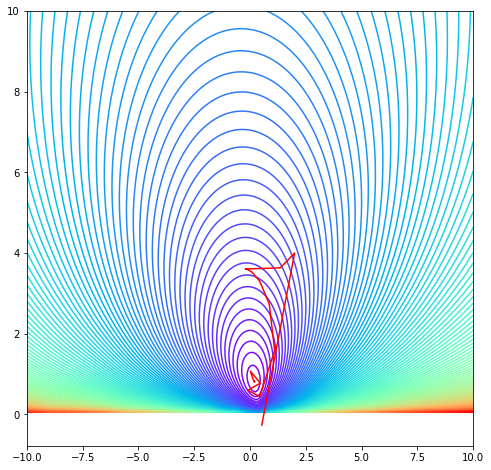

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

def LogCauchy(x): #x[0]=\mu y x[1]=\sigma
  s=-50*np.log(np.pi)+50*np.log(x[1])
  for i in range (1,51):
    k=x[1]**2 +(x0[i-1]-x[0])**2
    s=s-np.log(k)
  return -s #Como se busca maximizar, vamos a minimizar la funcion -Log(L)
def gradiente(x):
  k1=0
  k2=0
  for i in range (1,51):
    c=x0[i-1]-x[0]
    k1=k1+(2*c)/(x[1]**2+c**2)
    k2=k2+(2*x[1])/(x[1]**2+c**2)
  return np.array([ -k1  ,  -(50/x[1]) +k2] )


x_0=[2,4]
liX=[x0[0]]
liY=[x0[1]]
liF=[LogCauchy(x0)]
def store(X,V):
    global liX
    global liY
    global liF
    x, y = X
    liX.append(x)
    liY.append(y)
    liF.append(LogCauchy(X))


bnds=optimize.Bounds([-10,0],[10,10])

R=optimize.minimize(LogCauchy, x_0, method='trust-constr',bounds=bnds,callback=store,jac=gradiente,hess=optimize.BFGS(),tol=1e-16,options={'verbose': 1})
print("\n Los parametros (mu,sigma) obtenidos por el metodo de maxima verosimilitud serian: (mu,sigma)="+str(R.x))
x_min, x_max = -10,10
y_min, y_max = 0, 10 

xx = np.linspace(x_min,x_max,200) # Patición x
yy = np.linspace(y_min,y_max,200) # Patición y
X, Y = np.meshgrid(xx, yy)        # Malla

Z=LogCauchy([X,Y])

plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 150, cmap="rainbow") #nada, coolwarm
plt.plot(liX,liY, color='red')
  

Ahora vamos a comparar la estimación con la función de densidad real, para ello graficaremos la función de densidad real y la estimación obtenida, respectivamente:
\begin{equation}
f(x)=\frac{1}{\pi (1+x^2)}
\end{equation} 
\begin{equation}
f_{est}(x)=\frac{0.82690085}{\pi (0.68376501+(x-0.17934114)^2)}
\end{equation}





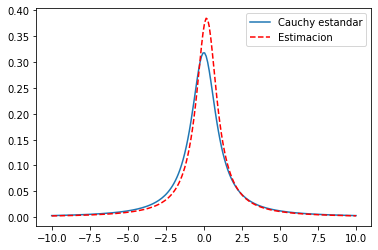

In [ ]:
xx = np.linspace(-10,10,200)
def Cauchystand(x):
  k=np.pi *(1+x**2)
  return 1/k
def estimacion(x):
  k=np.pi*(0.68376501+(x-0.17934114)**2)
  return (0.82690085)/k
plt.plot(xx,Cauchystand(xx),)
plt.plot(xx,estimacion(xx),'r--')
plt.legend(['Cauchy estandar','Estimacion'])



Mientras que si graficamos el error absoluto:
\begin{equation}
Error=\left|x_{real}-x_{estimado} \right|
\end{equation}
Obtenemos la siguiente grafica:

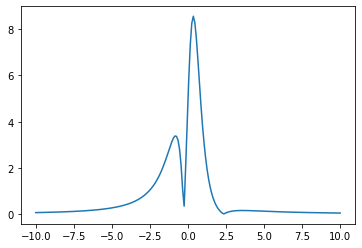

In [ ]:
def error(x):
  e=abs(Cauchystand(x)-estimacion(x))
  return e*100
plt.plot(xx,error(xx))

Donde como se puede observar, el maximo error absoluto es aproximadamente de 8, además, de que el error se aumenta considerablemente para valores cercanos a cero, el cual seria el centro mientras que para valores en la cola de función si 

# Optimización entera de funciones no lineales.
En esta segunda parte, vamos a presentar una forma de optimizar funciones no lineales que tienen como restricción que alguna de sus variables sea un entero, especificamente, que algunas variables pertenezcan a ciertas clases de equivalencia en los enteros. Para lograr esto, usaremos el hecho que la ecuación $sin(\pi x)=0$ tiene solución solo en los enteros y de que $x_1^2 +...+x_n^2=0$ tiene unica solucion $x_1=...=x_n=0$, entonces tenemos que las soluciones a la ecuación:
\begin{equation}
sin^2\left(\pi \frac{x_n-r_1}{d_1}\right)+...+sin^2\left(\pi \frac{x_n-r_n}{d_n}\right)=0
\end{equation}
Son de la forma $x_i\equiv r_i$ mod($d_i$). Si se quiere que $x_i\in\mathbb{Z}$ es simplemente se hace $r_i=0$ y $d_i=1$. En el presente trabajo vamos a tratar con el siguiente problema de optimización:
$$min \ \ f(x,y)=x^4 +2.81x^3 y +13.5 x^2 y^2 +xy+64.34$$

Sujeta a: $x,y\in \mathbb{Z}$ \\
      $\ \ \ \ \ \ \ \  \ \ \ \ \ x^2 +y^2\leq4$ \\
Por lo dicho anteriormente, la primera restricción se puede escribir como la siguiente ecuación:
$$sin^2\left(\pi x\right)+sin^2\left(\pi y\right)=0 $$
De esta manera, tenemos las restricciones de manera continua para poder usar el metodo Trust-Region, cabe resaltar que sin la restriccion entera el minimo se alcanza en (-0.246879,0.175715) y (0.246879,-0.175715).
Vamos a hallar el jacobiano y la matriz Hessiana de f:
$$\nabla f= \begin{pmatrix}4x^3 +8.43x^2 y +27xy^2 +y \\ 2.81x^3+27x^2 y +x   \end{pmatrix} $$
$$H_f=\begin{pmatrix}12x^2 +16.86xy+27y^2 & 8.43x^2+54xy+1\\ 8.43x^2+54xy+1 & 27x^2    \end{pmatrix}$$
Y con esto presente, procedemos visualizar la función y las curvas de nivel junto a la region factible que esta indicada de un color negro/gris:



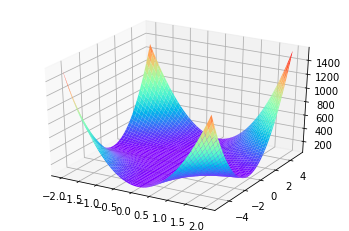

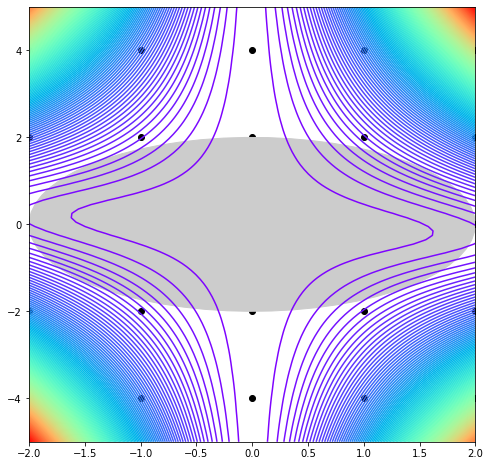

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import math

def fun(x):
  k=x[0]**4 +2.81*x[0]**(3)*x[1] +13.5*x[0]**(2)*x[1]**2 +x[0]*x[1]+64.34
  return k
#Ahora se graficara la funcion 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_min, x_max = -2, 2
y_min, y_max = -5, 5

xx = np.linspace(x_min,x_max,100) # Patición x
yy = np.linspace(y_min,y_max,100) # Patición y
X, Y = np.meshgrid(xx, yy)        # Malla

zs=np.array(fun([np.ravel(X),np.ravel(Y)])) 
Z=zs.reshape(X.shape)


ax.plot_surface(X, Y, Z, cmap='rainbow')

plt.show()
#Graficamos las curvas de nivel con colores.
plt.figure(figsize=(8, 8))
plt.contour(X, Y, Z, 150, cmap="rainbow") #coolwarm linestyles="dotted"
#Graficamos las restricciones
#Restricciones enteras
for i in range(-2,3):
  for j in range(-4,5):
    if j%2==0:
      plt.scatter(i,j,color='black')
#Restriccion del circulo
theta = np.arange(0, 2*np.pi, 0.1)
x1 = 2*np.cos(theta)
y1 = 2*np.sin(theta)
p1 = plt.fill(x1, y1, color='0.8')

plt.show()

Finalmente, procedemos a optimizar con el metodo Trust-Region, además de visualizar el recorrido del algoritmo:

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


`xtol` termination condition is satisfied.
Number of iterations: 167, function evaluations: 109, CG iterations: 12, optimality: 5.59e-17, constraint violation: 2.11e-15, execution time: 0.39 s.
El minimo se encuentra en [ 1.03411001e-08 -1.03411001e-08] con un valor minimo de 64.34


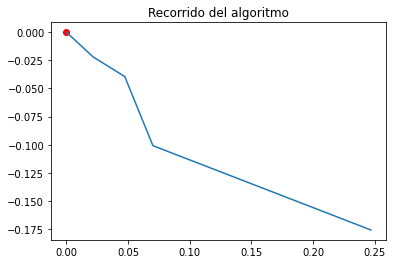

In [ ]:
#Definimos donde se va a guardar el proceso del algoritmo
x0=[0.246879,-0.175715]
liX=[x0[0]]
liY=[x0[1]]
liF=[fun(x0)]
def store(X,V):
    global liX
    global liY
    global liF
    x, y = X
    liX.append(x)
    liY.append(y)
    liF.append(fun(X))
#Definimos el jacobiano y el hessiano de la funcion a optimizar
def der_fun(t):
  return np.array([4*t[0]**3 +8.43*t[0]**2*t[1] +27*t[0]*t[1]**2 +t[1] , 2.81*t[0]**3+27*t[0]**2 *t[1]+t[0]])
def hessf(t):
  k1=12*t[0]**2 +16.86*t[0]*t[1]+27*t[1]**2
  k2=8.43*t[0]**2+54*t[0]*t[1]+1
  k3=27*t[0]**2
  return np.array([[k1,k2],[k2,k3]])
#Se define la restriccion de los enteros y 5|x junto a su derivada y hessiano
def con1(t):
  k= (np.sin(np.pi*t[0]))**2 + (np.sin(np.pi*t[1]))**2 
  return k
def der_con1(t):
  return np.array([2*np.pi*np.sin(np.pi *t[0])*np.cos(np.pi *t[0]) , 2*np.pi*np.sin(np.pi *t[1])*np.cos(np.pi *t[1]) ])
def hesscon1(t,v):
  k1=2*np.pi*np.pi*np.cos(2*np.pi*t[0])
  k2=2*np.pi*np.pi*np.cos(2*np.pi*t[1])
  return v[0]*np.array([[k1,0],[0,k2]])
#Se define la restriccion del circulo
def con2(t):
  return t[0]**2+t[1]**2-4
#Se crean las restricciones
nlc1=optimize.NonlinearConstraint(con1,0,0,jac=der_con1,hess=hesscon1,keep_feasible=True) 
nlc2=optimize.NonlinearConstraint(con2,-np.inf,4) 
#Optimizamos
m=optimize.minimize(fun, x0, method='trust-constr',constraints=[nlc1,nlc2],callback=store, jac=der_fun,hess=hessf,tol=1e-16,options={'verbose': 1,'maxiter':1000} )
print('El minimo se encuentra en '+str(m.x)+' con un valor minimo de '+str(m.fun))
#Graficamos el recorrido del algoritmo
plt.plot(liX,liY)
plt.scatter(m.x[0],m.x[1],color='red')
plt.title('Recorrido del algoritmo')
plt.show(['x','y'])



Ahora vamos a ver si los valores que va tomando el algoritmo son activos o no en las restricciones:

In [ ]:
print('En la restriccion entera= '+str(con1(m.x)))
print('En la restriccion del circulo= '+str(con2(m.x)))

En la restriccion entera= 2.11087845131034e-15
En la restriccion del entero= -4.0


Con lo que nos arroja el optimo en (0,0) con un valor minimo de 64.34 en comparación del problema sin restricción entera es 64.3183. Claramente este es un problema de optimizacion muy sencillo, la principal razon de haber elegido este es la visualización del algoritmo ya que esta forma de resolver problemas de optimización entera es muy eficiente para dimensiones muy altas, ejemplos de esto se iran tratando más adelante para verificar la eficiencia de este metodo.

# Conclusiones
Podemos ver como la optimización juega un rol importante a la hora de la estimación puntual usada en estadistica, ya que hay funciones de densidad para las cuales no sera facil calcular su maximo de manera analitica. En el presente trabajos se expusieron dos ejemplos de dos aplicaciones importantes del metodo Trust-Region, aunque no sean ejemplos que demuestren enteramente el potencial del algoritmo, sirven para visualizar el trabajo de este ya que si tratamos con funciones de densidad conjuntas o con problemas de optimización entera no podremos hacernos una idea intuitiva del algoritmo ya que son de muchas dimensiones. Por el lado del uso de ecuaciones para describir de una manera diferenciable restricciones del tipo enteras e incluso modular, en dimensiones bajas el metodo Branch and Bounds resulta ser mucho más eficiente, sin embargo, para dimensiones muy altas un metodo de busqueda continua como el Trust-Region promete ser mejor, como ya se aclaro el objetivo del presente trabajo era visualizar el alcance del metodo y más adelante se probaran los limites del mismo.
# Referencias 
[1] Ferguson, Thomas S. "*Maximum Likelihood Estimates of the Parameters of the Cauchy Distribution for  samples of size 3 and 4*".Journal of the American statistical Association,1978.



